# Introdução: Detecção de Anomalias

A detecção de anomalias é uma técnica usada para identificar padrões incomuns que não estão em conformidade com o comportamento esperado, chamados de discrepantes. Possui muitas aplicações nos negócios, desde a detecção de intrusões (identificando padrões estranhos no tráfego da rede que podem sinalizar um hack) até o monitoramento da integridade do sistema (detectando um tumor maligno em uma ressonância magnética) e da detecção de fraudes nas transações com cartão de crédito à detecção de falhas no sistema. ambientes operacionais.

Neste bloco de anotações jupyter, consideraremos a detecção de fraude de cartão de crédito como um estudo de caso para entender esse conceito em detalhes.

## O que são anomalias?
Na mineração de dados, a detecção de anomalias (também a detecção externa) é a identificação de itens raros, eventos ou observações que levantam suspeitas, diferindo significativamente da maioria dos dados.
As anomalias podem ser amplamente categorizadas como:

*** Anomalias de pontos: *** Uma única instância de dados é anômala, se estiver muito longe do resto. Caso de uso comercial: detecção de fraude no cartão de crédito com base no "valor gasto".

*** Anomalias contextuais: *** A anormalidade é específica do contexto. Esse tipo de anomalia é comum em dados de séries temporais. Caso de uso comercial: gastar US $ 100 em alimentos todos os dias durante o feriado é normal, mas pode ser estranho.

*** Anomalias coletivas: *** Um conjunto de instâncias de dados ajuda coletivamente na detecção de anomalias. Caso de uso comercial: alguém está tentando copiar dados de uma máquina remota para um host local inesperadamente, uma anomalia que seria sinalizada como um possível ataque cibernético.

- A detecção de anomalias é semelhante a - mas não é a mesma coisa que - remoção de ruídos e detecção de novidades.

- *** Detecção de novidade *** se preocupa em identificar um padrão não observado em novas observações não incluídas nos dados de treinamento, como um interesse repentino em um novo canal no YouTube durante o Natal, por exemplo.

- *** Remoção de ruído (NR) *** é o processo de remoção de ruído de um sinal significativo.

Aqui estão alguns:

- Os dados contêm ruído que pode ser semelhante ao comportamento anormal, porque a fronteira entre comportamento normal e anormal geralmente não é precisa.

- A definição de anormal ou normal pode mudar com frequência, pois adversários maliciosos se adaptam constantemente. Portanto, o limite com base na média móvel nem sempre pode ser aplicado.

- O padrão é baseado na sazonalidade. Isso envolve métodos mais sofisticados, como decompor os dados em várias tendências, a fim de identificar a mudança na sazonalidade.

## 2. Abordagens baseadas em aprendizado de máquina

Abaixo está uma breve visão geral das técnicas populares baseadas em aprendizado de máquina para detecção de anomalias.

#### a.Detecção de anomalias com base na densidade
A detecção de anomalia baseada em densidade é baseada no algoritmo de vizinhos k-mais próximos.

Suposição: pontos de dados normais ocorrem em torno de uma vizinhança densa e as anormalidades estão distantes.

O conjunto de pontos de dados mais próximo é avaliado usando uma pontuação, que pode ser a distância euclediana ou uma medida semelhante, dependendo do tipo de dados (categórico ou numérico). Eles podem ser classificados em dois algoritmos:

*** K-vizinho mais próximo ***: k-NN é uma técnica simples e não paramétrica de aprendizado preguiçoso usada para classificar dados com base em similaridades em métricas de distância, como distância Eucledian, Manhattan, Minkowski ou Hamming.

*** Densidade relativa dos dados ***: é mais conhecido como fator outlier local (LOF). Esse conceito é baseado em uma métrica de distância chamada distância de acessibilidade.

#### b. Detecção de anomalias com base em cluster
O agrupamento é um dos conceitos mais populares no domínio da aprendizagem não supervisionada.

Suposição: pontos de dados semelhantes tendem a pertencer a grupos ou clusters semelhantes, conforme determinado pela distância dos centróides locais.

*** K-means *** é um algoritmo de clustering amplamente utilizado. Ele cria 'k' clusters semelhantes de pontos de dados. Instâncias de dados que se enquadram fora desses grupos podem ser marcadas como anomalias.

#### c.Suporte detecção de anomalia baseada em máquina de vetores

- Uma máquina de vetores de suporte é outra técnica eficaz para detectar anomalias.
- Um SVM geralmente está associado ao aprendizado supervisionado, mas existem extensões (OneClassCVM, por exemplo) que podem ser usadas para identificar anomalias como problemas não supervisionados (nos quais os dados de treinamento não são rotulados).
- O algoritmo aprende um limite flexível para agrupar as instâncias de dados normais usando o conjunto de treinamento e, em seguida, usando a instância de teste, ajusta-se para identificar as anormalidades que caem fora da região aprendida.
- Dependendo do caso de uso, a saída de um detector de anomalia pode ser valores escalares numéricos para filtragem em limites específicos do domínio ou rótulos de texto (como rótulos binários / múltiplos).


Neste bloco de anotações jupyter, consideraremos a detecção de fraude de cartão de crédito como um estudo de caso para entender esse conceito em detalhes usando as seguintes técnicas de detecção de anomalias, a saber

#### Algoritmo de detecção de anomalia na floresta de isolamento

#### Algoritmo de detecção de anomalias com base na densidade (fator externo externo)

#### Suporte ao algoritmo de detecção de anomalias de máquinas vetoriais

## Detecção de fraude no cartão de crédito

## Declaração do problema:

O problema de detecção de fraude de cartão de crédito inclui a modelagem de transações passadas de cartão de crédito com o conhecimento daquelas que se revelaram fraudes. Esse modelo é usado para identificar se uma nova transação é fraudulenta ou não. Nosso objetivo aqui é detectar 100% das transações fraudulentas, minimizando as classificações incorretas de fraude.

#### DataSet:

O conjunto de dados usado para a detecção de fraude no cartão de crédito é derivado do seguinte URL do Kaggle:

https://www.kaggle.com/mlg-ulb/creditcardfraud


#### Observações

- O conjunto de dados é altamente distorcido, consistindo em 492 fraudes, num total de 284.807 observações. Isso resultou em apenas 0,172% de casos de fraude. Esse conjunto distorcido é justificado pelo baixo número de transações fraudulentas.

- O conjunto de dados consiste em valores numéricos dos 28 recursos transformados 'Análise de componente principal (PCA)' ', ou seja, V1 a V28. Além disso, não há metadados sobre os recursos originais fornecidos, portanto, a pré-análise ou o estudo dos recursos não pôde ser realizado.

- Os recursos "Tempo" e "Quantidade" não são dados transformados.

- Não há valor ausente no conjunto de dados.

## Pré-processando

### Importar bibliotecas

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
workdir_path = '/content/drive/My Drive/'  # Inserir o local da pasta onde estão os arquivos de entrada (treino e teste)
os.chdir(workdir_path)

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
#import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot

In [3]:
data = pd.read_csv('creditcard.csv',sep=',')

print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
data1= data.sample(frac = 0.1,random_state=1)

data1.shape

(28481, 31)

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Analise exploratoria

In [6]:
data.shape

(284807, 31)



Vamos agora verificar os valores ausentes no conjunto de dados

In [7]:
data.isnull().values.any()

False

In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


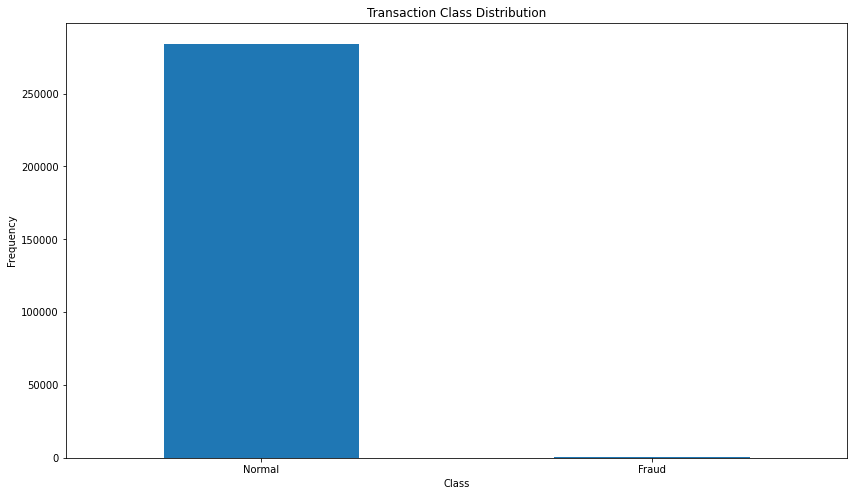

In [9]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

Determine o número de fraudes e transações válidas em todo o conjunto de dados.

In [10]:
Fraud = data[data['Class']==1]

Normal = data[data['Class']==0]

In [11]:
Fraud.shape

(492, 31)

In [12]:
Normal.shape

(284315, 31)

Quão diferente é a quantidade de dinheiro usada em diferentes classes de transação?

In [13]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Quão diferente é a quantidade de dinheiro usada em diferentes classes de transação?

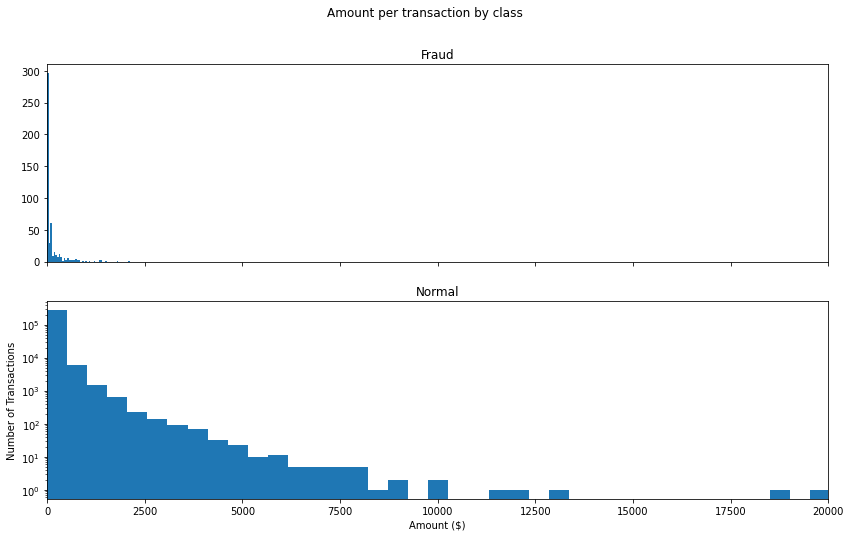

In [15]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

As transações fraudulentas ocorrem com mais frequência durante determinado período de tempo? Vamos descobrir com uma representação visual.

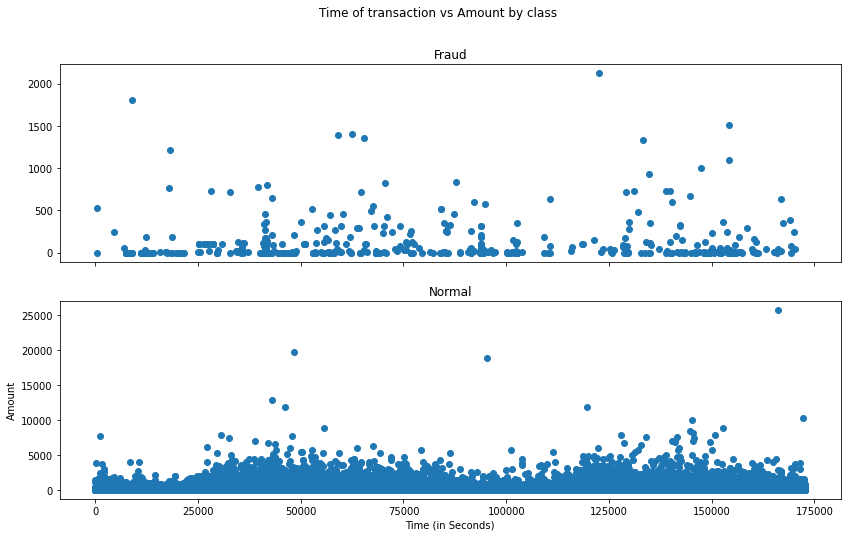

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()


Não parece que o tempo da transação realmente importe aqui, conforme a observação acima.
Agora vamos dar uma amostra do conjunto de dados para modelagem e previsão

In [17]:
data1.shape

(28481, 31)

Traçar o histograma de cada parâmetro

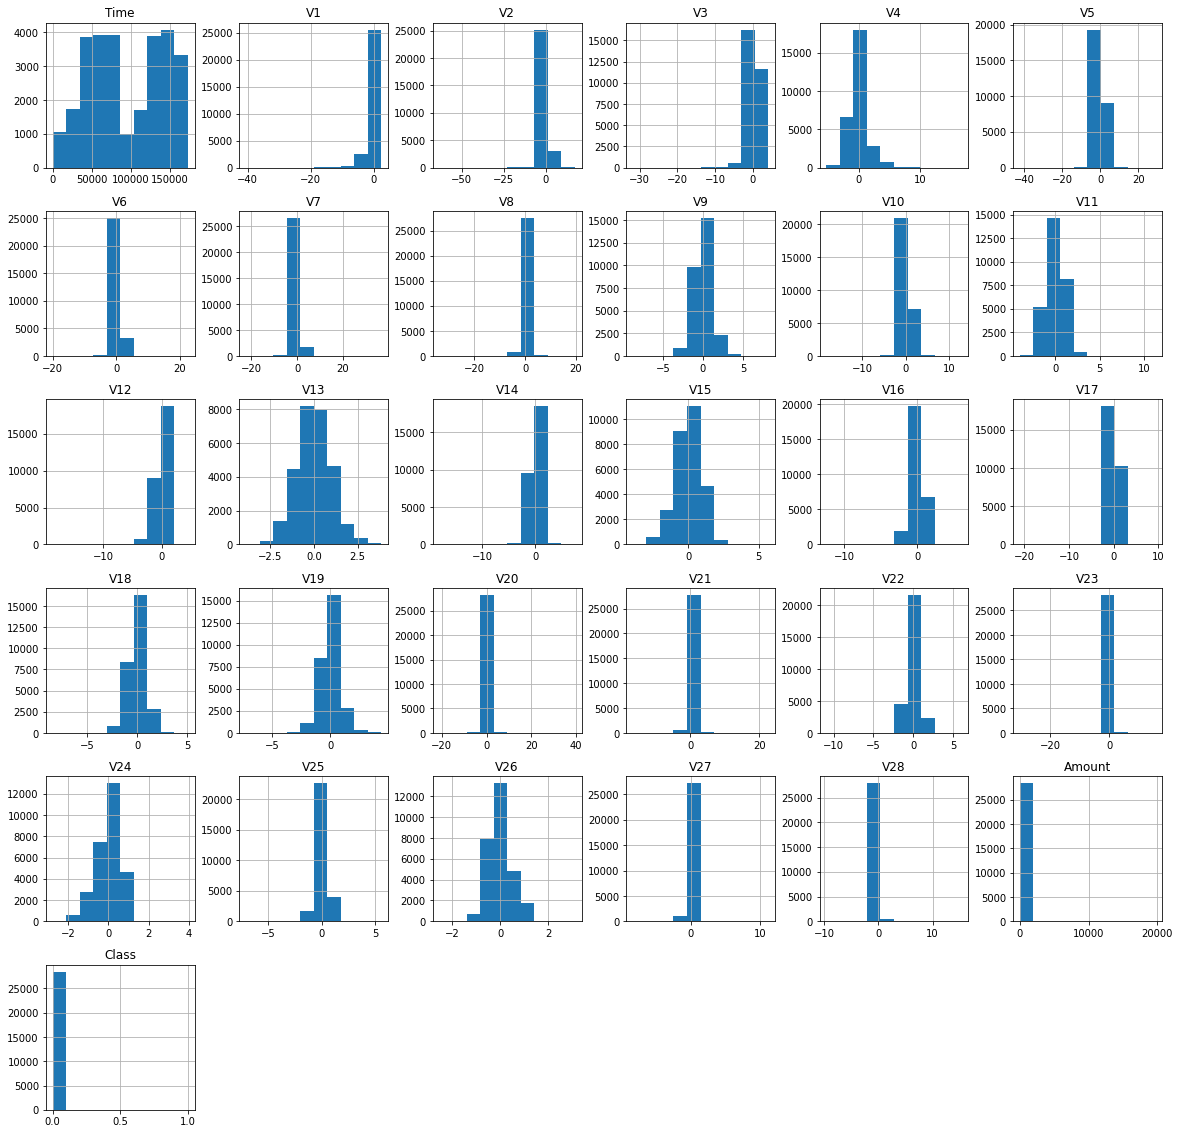

In [18]:
data1.hist(figsize=(20,20))
plt.show()

Determine o número de fraudes e transações válidas no conjunto de dados.

In [19]:
Fraud = data1[data1['Class']==1]
Valid = data1[data1['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

Agora, vamos imprimir a fração outlier e o número de casos de fraude e transação válida

In [20]:
print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


Matriz de correlação

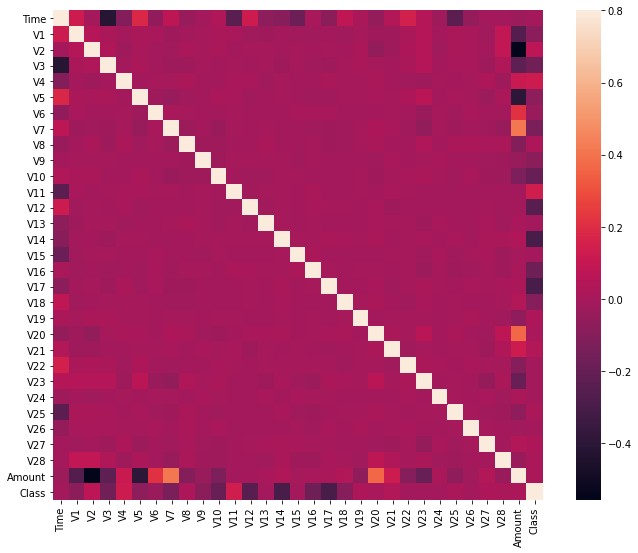

In [21]:
correlation_matrix = data1.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

A matriz de correlação acima mostra que nenhum dos componentes PCA V1 a V28 tem correlação entre si, no entanto, se observarmos que a Classe possui alguma forma de correlações positivas e negativas com os componentes V, mas não tem correlação com Tempo e quantidade.

Obter todas as colunas do quadro de dados

In [22]:
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


## Modelo de predição

Agora é hora de começar a construir o modelo. Os tipos de algoritmos que vamos usar para tentar detectar a anomalia nesse conjunto de dados são os seguintes

#### 1. Algoritmo da floresta de isolamento:
Uma das mais novas técnicas para detectar anomalias é chamada Florestas de Isolamento. O algoritmo é baseado no fato de que anomalias são pontos de dados que são poucos e diferentes. Como resultado dessas propriedades, as anomalias são suscetíveis a um mecanismo chamado isolamento.

Este método é altamente útil e é fundamentalmente diferente de todos os métodos existentes. Introduz o uso do isolamento como um meio mais eficaz e eficiente para detectar anomalias do que as medidas básicas de distância e densidade usadas. Além disso, este método é um algoritmo com baixa complexidade de tempo linear e um pequeno requisito de memória. Ele cria um modelo de bom desempenho com um pequeno número de árvores usando pequenas subamostras de tamanho fixo, independentemente do tamanho de um conjunto de dados.

Os métodos típicos de aprendizado de máquina tendem a funcionar melhor quando os padrões que eles tentam aprender são equilibrados, significando a mesma quantidade de comportamentos bons e ruins presentes no conjunto de dados.

Como funcionam as florestas de isolamento

O algoritmo Floresta de isolamento isola as observações selecionando aleatoriamente um recurso e, em seguida, selecionando aleatoriamente um valor de divisão entre os valores máximo e mínimo do recurso selecionado. O argumento lógico é o seguinte: isolar observações de anomalias é mais fácil porque são necessárias apenas algumas condições para separar esses casos das observações normais. Por outro lado, isolar observações normais requer mais condições. Portanto, uma pontuação de anomalia pode ser calculada como o número de condições necessárias para separar uma determinada observação.

A maneira como o algoritmo constrói a separação é criando primeiro árvores de isolamento ou árvores de decisão aleatórias. Então, a pontuação é calculada como o comprimento do caminho para isolar a observação.

#### 2. Algoritmo de fator externo externo (LOF)

O algoritmo LOF é um método de detecção de outlier não supervisionado que calcula o desvio de densidade local de um dado ponto de dados em relação aos seus vizinhos. Considera amostras discrepantes que têm uma densidade substancialmente mais baixa do que seus vizinhos.

O número de vizinhos considerados (parâmetro n_neighbors) geralmente é escolhido 1) maior que o número mínimo de objetos que um cluster deve conter, para que outros objetos possam ser discrepantes locais em relação a esse cluster e 2) menor que o número máximo de perto de objetos que podem ser potencialmente outliers locais. Na prática, essas informações geralmente não estão disponíveis e aceitar n_neighbors = 20 parece funcionar bem em geral.


Definir os métodos de detecção de outlier

In [23]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

Fit the model

In [24]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 73
Accuracy Score :
0.9974368877497279
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
Accuracy Score :
0.9965942207085425
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

Support Vector Machine: 8516
Accuracy Score :
0.7009936448860644
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.70   

#### Observações:
- Floresta de isolamento detectou 73 erros versus o fator externo externo detectando 97 erros vs. SVM detectando erros 8516
- Floresta de isolamento tem 99,74% mais preciso que LOF de 99,65% e SVM de 70,09
- Ao comparar a precisão do erro e a recuperação de três modelos, a Floresta de Isolamento teve um desempenho muito melhor que o LOF, pois podemos ver que a detecção de casos de fraude é de cerca de 27% versus a taxa de detecção de LOF de apenas 2% e SVM de 0%.
- Portanto, o método geral de isolamento florestal teve um desempenho muito melhor na determinação dos casos de fraude, que é de cerca de 30%.
- Também podemos melhorar essa precisão aumentando o tamanho da amostra ou usando algoritmos de aprendizado profundo, no entanto, às custas das despesas computacionais. Também podemos usar modelos complexos de detecção de anomalias para obter melhor precisão na determinação de casos mais fraudulentos

en la proxima aula  ***Autoencoders***
